# SLIC Overview

## Algorithm

**Description:** The SLIC superpixels algorithm segments pixels in an image file to efficiently generate compact, nearly uniform superpixels.

**Inputs:** 
    1. image: the image to be segmented
    2. n_segments: defines how many superpixel segments we want to generate (defaults to 100 segments)
    3. sigma: the standard deviation for the smoothing Gaussian kernel applied before segmentation
    4. max_iter: the maximum number of iterations for k-means clustering

**Outputs:**
    1. The segmented image 

# Simulation Data

### **Success Data**

### **1. write the sampling/generative distributions that you will write to test the code**

* The data that we suspect will suceed is one with 27 20x20x20 'synapse' clusters of intensity 100 within a 100x100x100 area
* we expect the SLIC Superpixel algorithm to segment the 27-synapse data set into 125 clusters

### **2. write code to sample data from the success settings**

In [14]:
import numpy as np

clusterGrid = np.zeros((100, 100, 100))
for i in range(4):
    for j in range(4):
        for k in range(4):
            clusterGrid[20*(2*j): 20*(2*j + 1), 20*(2*i): 20*(2*i + 1), 20*(2*k): 20*(2*k + 1)] = 200

### **3. describe in words what you think the simulations will look like**
I believe this code will produce a volume of size 100x100x100 with 27 'synapse' clusters of size 20x20x20 with intensity 100.

### **4/5. write code to plot simulated data/plot simulated data**

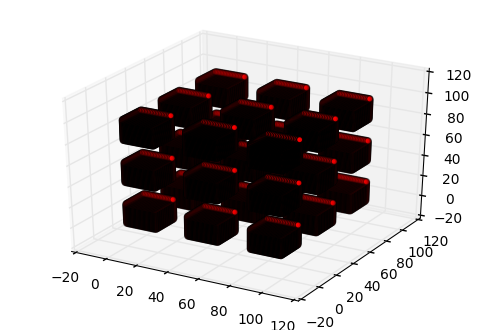

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = clusterGrid.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.show()

### **6. report whether it looks "right"**
The clusterGrid is precisely what I expected it would be. It produced a volume of size 100x100x100 with 27 'synapse' clusters of size 20x20x20 with intensity 100.

## Failure Data

### **1. write the sampling/generative distributions that you will write to test the code**

* The data that we suspect will suceed is a perfectly uniform data set of area 20x20x20 with intensity 100.
* we expect the SLIC Superpixel algorithm to segment the uniform data set in a grid-like pattern, as there are no clusters in the data to segment, and the algorithm naturally tries to equalize the size of the segments.

### **2. write code to sample data from the success settings**

In [11]:
all100Dat = np.zeros((100, 100, 100)) + 100

### **3. describe in words what you think the simulations will look like**
I believe this code will produce a uniform volume of size 100x100x100 with intensity 100.

### **4/5. write code to plot simulated data/plot simulated data**

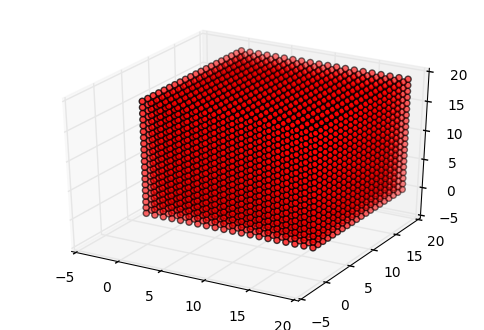

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = all100Dat.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.show()

### **6. report whether it looks "right"**
The clusterGrid is precisely what I expected it would be. It produced a uniform volume of size 100x100x100 with intensity 100.

# Simulation Analysis

## **1. write algorithm pseudocode**

i. Initialize cluster centers $C_{k} = [l_{k}, a_{k}, b_{k}, x_{k}, y_{k}]^T $ by sampling pixels at regular grid steps $S$.

ii. Based off of user-the input $n-segments$ and the total image size, compute the average segment-size, $ n = \frac{totalImSize}{n-segments}$

iii. Using the average segment-size, $n$, assign each voxel in an $nxn$ neighborhood around each cluster to a cluster center $C_k$

iv. repeat the following: <br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;for each cluster center $C_k$:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Assign the best matching pixels from a $2S x 2S$ neighborhood around each center cluster $C_k$ according to the following 
            distance metric: <br>
            &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$D_s = d_{col} + \frac{m}{S}d_{dist}$, where $d_{col}$ = the L2 color-wise distance of the voxel from the center-voxel of $C_{k}$, $d_{dist}$ = the L2 Euclidian distance of the voxel  <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;from the center-voxel of $C_{k}$, and $m$ is the compactness metric specified by the user for prefererence of color-wise clustering vs. distance-clustering
<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Compute new cluster centers and residual error $E$ = L1 distance between previous centers and recomputed centers
<br>&nbsp;&nbsp;&nbsp;repeat until until $E ≤ threshold$
            

## 2. write algorithm code

In [ ]:
#import the proper files
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

# load the image and convert it to a floating point data type
image = img_as_float(io.imread(args["image"]))

#creates an image for the overlaying superpixels
segments = slic(image, n_segments = numSegments, sigma = 5)

#takes our original image and overlays our superpixel segments
displayIm = mark_boundaries(image, segments)

## 3. describe in words how you think the algorithm will perform in the easy simulation
### Success 
I believe the algorithm will perfectly segment the 27-cluster data into 125 clusters.
### Failure 
I believe the algorithm will segment the data in a grid-like pattern

## 4. generate simulated data
see sections 4 and 5 of previous chapter 

## 5/6. run algorithm on simulated data/plot results
### Success

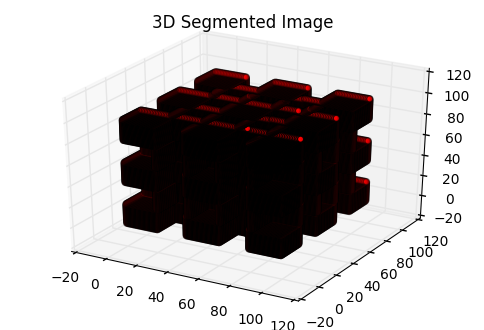

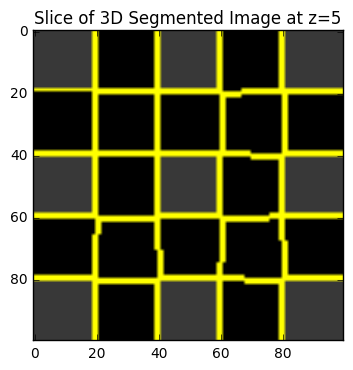

In [17]:
displayIm = np.zeros_like(clusterGrid)
for zindex in range(len(clusterGrid)):

    #SLIC the slice
    clusterGridSlice = clusterGrid[zindex]

    #creates an image for the overlaying superpixels
    segments = slic(clusterGridSlice, n_segments = 25)

    #takes our original image and overlays our superpixel segments
    segmentedSlice = mark_boundaries(clusterGridSlice, segments)[0: 100, 0: 100, 0]
    
    #puts this overlapping image in the display image
    displayIm[zindex] = segmentedSlice
    



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = displayIm.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.title('3D Segmented Image')
plt.show()

plt.imshow(displayIm[5])
plt.title('Slice of 3D Segmented Image at z=5 ')
plt.show()

### Failure

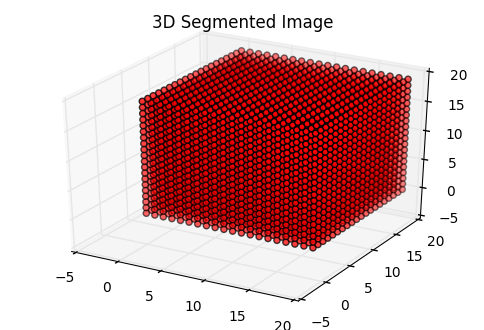

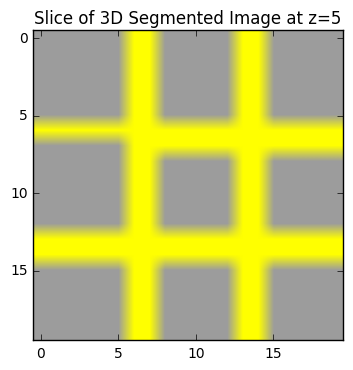

In [20]:
displayIm = np.zeros_like(all100Dat)
for zindex in range(len(all100Dat)):

    #SLIC the slice
    all100DatSlice = all100Dat[zindex]

    #creates an image for the overlaying superpixels
    segments = slic(all100DatSlice, n_segments = 25)

    #takes our original image and overlays our superpixel segments
    segmentedSlice = mark_boundaries(all100DatSlice, segments)[0: 100, 0: 100, 0]
    
    #puts this overlapping image in the display image
    displayIm[zindex] = segmentedSlice
    
#display
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z, y, x = displayIm.nonzero()
ax.scatter(x, y, z, zdir='z', c='r')
plt.title('3D Segmented Image')
plt.show()

plt.imshow(displayIm[5])
plt.title('Slice of 3D Segmented Image at z=5 ')
plt.show()

# Summarize Simulation Analysis
## Success
The 27-cluster data performed exactly as expected. It segmented the image into 125 clusters. To confirm, I visualized the 5th slice and, as expected, it had 25 segments. 

## Failure
The uniform data performed exactly as expected. It segmented the image into a grid-like pattern. To confirm, I visualized the 5th slice and, as expected, it was in a grid-like pattern. A bit of intuition behind this result: the SLIC algorithm first groups the image into cubes, and then re-assigns voxels to different clusters based on color and distance. Because this is a uniform data-set, the voxels were never re-assigned, and instead retained the initial cube-shape.

# Realistic Simulated Data Analysis
## 1. Data Set

In [49]:
import pickle

realData = pickle.load(open('../code/tests/synthDat/realDataRaw_t0.synth'))
realDataSection = realData[0: 5]

## 2. Real Data Description 
Realistic Simulated Data testing will be performed on a a 100x100x100 volume with a pixel intensity distribution approximately the same as that of the true image volumes (i.e., 98% noise, 2% synapse). The synapse pixels will be grouped together in clusters as they would in the true data. Based on research into the true size of synapses, these synthetic synapse clusters will be given area of ~.2 microns ^3, or about 27 voxels (assuming the synthetic data here and the real world data have identical resolutions). 

## 3. Plotting Raw Data
Plotting the 3-dimensional image just returned a black box, as the data is 98% background. Thus, I will plot a 2-dimensional slice at z=2 for better visualization.

In [60]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../code/functions/')
import plosLib as pLib

plosDataSection = pLib.pipeline(realDataSection)

In [108]:
import sys
sys.path.insert(0,'../code/functions/')
import connectLib as cLib 

plosDataSlice = plosDataSection[2]
otsuDataSlice = cLib.otsuVox(plosDataSlice)
rgbDataSlice = Image.fromarray(otsuDataSlice)

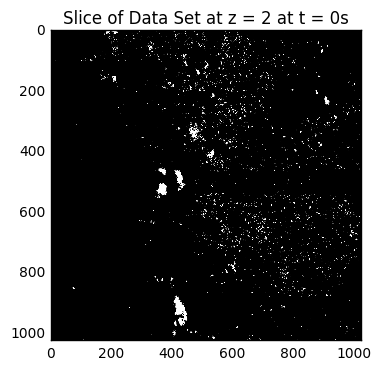

In [106]:
plt.imshow(rgbDataSlice, cmap='gray')
plt.title('Slice of Data Set at z = 2 at t = 0s')
plt.show()

## 4. Predicting Performance
I believe that the larger clusters will be segmented very well, and the smaller clusters will be segmented into groups. I also suspect that the background will be segmented in a grid-pattern, as the algorithm naturally tries to equalize the size of the segmented groups.

## 5. Run Code on Real Data

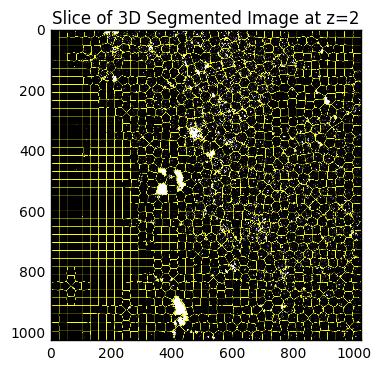

In [110]:
#imports 
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

displayIm = np.zeros_like(realData)
for zindex in range(len(realData)):

    #SLIC the slice
    imSlice = im[zindex]

    #creates an image for the overlaying superpixels
    segments = slic(imSlice, n_segments = 1500)

    #takes our original image and overlays our superpixel segments
    segmentedSlice = mark_boundaries(imSlice, segments)[0: 1024, 0: 1024, 0]
    
    #puts this overlapping image in the display image
    displayIm[zindex] = segmentedSlice

    
plt.imshow(segmentedSlice[2])
plt.title('Slice of 3D Segmented Image at z=2')
plt.show()

## 6. Document performance accuracy relative to predictions
As predicted, the larger clusters were semgented very well, while the smaller, grouped clusters were segmented into groups rather than individually. The background was also segmented into a grid. In the future, an algorithm that allows segmentation with non-restrictive segmentation size would improve performance, as it could group the entire background into one segment, and segment each small cluster individually rather than group them together as to equalize the size of the segments.